In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import matplotlib
matplotlib.rcParams["figure.figsize"]=(20,10)

In [2]:
df1=pd.read_csv('C:/Users/chaitanya/OneDrive/Documents/bengaluru_house_prices.csv')
df1.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [4]:
df1.shape

(2499, 9)

In [5]:
df1.groupby('area_type')['area_type'].agg('count')

area_type
Built-up  Area                                                                                        461
Built-up  Area,18-Jun,"Off Sarjapur Road, ",3 BHK,,1798,3,2,89                                          1
Built-up  Area,19-Dec,"Hoodi Circle, ",2 BHK,,1243,2,1,58                                               1
Built-up  Area,19-Jul,"Yemlur, Old Airport Road, ",3 BHK,,1595,3,2,115                                  1
Built-up  Area,20-Dec,"ECC Road, Whitefield, ",2 BHK,,1132,2,1,67                                       1
Built-up  Area,20-Dec,"Hoodi Circle, ",3 BHK,,1629,3,2,79                                               1
Built-up  Area,Ready To Move,"Lakshminarayanapura, Electronic City Phase 2",4 BHK,,2000,4,1,75.5        1
Built-up  Area,Ready To Move,"Pai layout , Mahadevapura",6 BHK,,2700,4,2,214                            1
Built-up  Area,Ready To Move,"Sarjapur Road, ",3 Bedroom,,3329,3,2,330                                  1
Built-up  Area,Ready To Move,"Thanis

In [6]:
df2=df1.drop(['area_type','society','availability','balcony'],axis='columns')

In [7]:
df2.head()

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00


In [8]:
df2.isna().sum()

location      14
size          16
total_sqft    13
bath          30
price         13
dtype: int64

In [9]:
df3=df2.dropna()
df3.isna().sum()

location      0
size          0
total_sqft    0
bath          0
price         0
dtype: int64

In [10]:
df3.shape

(2468, 5)

In [11]:
df3['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom'],
      dtype=object)

In [12]:
df3['bhk']=df3['size'].apply(lambda x:int( x.split(' ')[0]))

C:\Users\chaitanya\AppData\Local\Temp\ipykernel_16928\1466528402.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['bhk']=df3['size'].apply(lambda x:int( x.split(' ')[0]))


In [13]:
df3.head()

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3
4,Kothanur,2 BHK,1200,2.0,51.00,2


In [14]:
df3['bhk'].unique()

array([ 2,  4,  3,  6,  1,  8,  7,  5, 11,  9, 27, 10], dtype=int64)

In [15]:
df3[df3.bhk>20]

,location,size,total_sqft,bath,price,bhk
1718,2Electronic City Phase II,27 BHK,8000,27.0,230.0,27


In [16]:
df3.total_sqft.unique()

array(['1056', '2600', '1440', '1521', '1200', '1170', '2732', '3300',
       '1310', '1020', '1800', '2785', '1000', '1100', '2250', '1175',
       '1180', '1540', '2770', '600', '1755', '2800', '1767', '510',
       '1250', '660', '1610', '1151', '1025', '2100 - 2850', '1075',
       '1760', '1693', '1925', '700', '1070', '1724', '1290', '1143',
       '1296', '1254', '1330.74', '970', '1459', '800', '869', '1270',
       '1670', '2010', '1185', '1600', '1500', '1407', '840', '4395',
       '845', '5700', '1160', '3000', '1140', '1220', '1350', '1005',
       '500', '1358', '1569', '1240', '2089', '1206', '1150', '2511',
       '460', '4400', '1660', '1326', '1325', '1499', '1665', '708',
       '1060', '710', '1450', '2894', '1330', '2502', '650', '2400',
       '1007', '966', '1630', '1640', '782', '1260', '1413', '1116',
       '1530', '3700', '2497', '1436', '276', '1427', '2061',
       '3067 - 8156', '2650', '1282', '1050', '945', '950', '1870', '880',
       '1535', '1360', '1

In [17]:
def is_float(x):
      try:
          float(x)
      except:
          return False
      return True

In [18]:
df3[~df3['total_sqft'].apply(is_float)].head(10)

,location,size,total_sqft,bath,price,bhk
30,Yelahanka,4 BHK,2100 - 2850,4.0,186.000,4
122,Hebbal,4 BHK,3067 - 8156,4.0,477.000,4
137,8th Phase JP Nagar,2 BHK,1042 - 1105,2.0,54.005,2
165,Sarjapur,2 BHK,1145 - 1340,2.0,43.490,2
188,KR Puram,2 BHK,1015 - 1540,2.0,56.800,2
410,Kengeri,1 BHK,34.46Sq. Meter,1.0,18.500,1
549,Hennur Road,2 BHK,1195 - 1440,2.0,63.770,2
648,Arekere,9 Bedroom,4125Perch,9.0,265.000,9
661,Yelahanka,2 BHK,1120 - 1145,2.0,48.130,2
672,Bettahalsoor,4 Bedroom,3090 - 5002,4.0,445.000,4


In [19]:
def convert_sqft_to_num(x):
    tokens = x.split('-')
    if len(tokens) == 2:
        return (float(tokens[0])+float(tokens[1]))/2
    try:
        return float(x)
    except:
        return None

In [20]:
convert_sqft_to_num('2166')

2166.0

In [21]:
convert_sqft_to_num('2100-2850')

2475.0

In [22]:
df4=df3.copy()

In [23]:
df4['total_sqft'] = df4['total_sqft'].apply(convert_sqft_to_num)
df4.head(3)

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3


In [24]:
df4.loc[30]

location      Yelahanka
size              4 BHK
total_sqft       2475.0
bath                4.0
price             186.0
bhk                   4
Name: 30, dtype: object

In [25]:
df5=df4.copy()

In [26]:
df5['price_per_sqft']=df5['price']*100000/df5['total_sqft']
df5.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000


In [27]:
len(df5.location.unique())

640

In [28]:
df5.location = df5.location.apply(lambda x:x.strip())
location_stats = df5.groupby('location')['location'].agg('count').sort_values(ascending=False)
location_stats.head(30)


location
Whitefield                  92
Sarjapur  Road              57
Electronic City             57
Kanakpura Road              54
Yelahanka                   40
Thanisandra                 38
7th Phase JP Nagar          36
Marathahalli                36
Raja Rajeshwari Nagar       32
Uttarahalli                 32
Hebbal                      30
Haralur Road                29
Hennur Road                 26
Bannerghatta Road           26
Electronic City Phase II    23
Chandapura                  20
Sarjapur                    19
Hoodi                       19
Yeshwanthpur                18
TC Palaya                   17
Harlur                      17
Kengeri                     17
Begur Road                  16
Electronics City Phase 1    16
Hosa Road                   16
Bellandur                   15
Kasavanhalli                15
Rajaji Nagar                15
KR Puram                    15
Koramangala                 14
Name: location, dtype: int64

In [29]:
len(location_stats[location_stats<=10])

592

In [30]:
location_stats_less_than_10 = location_stats[location_stats<=10]
location_stats_less_than_10

location
Kengeri Satellite Town    10
Kothannur                 10
Hosur Road                10
Mysore Road               10
Jakkur                    10
                          ..
Hosahalli                  1
Hoodi Layout               1
Hiremath Layout            1
Himagiri Meadows           1
sapthagiri Layout          1
Name: location, Length: 592, dtype: int64

In [31]:
len(df5.location.unique())

637

In [32]:
df5.location = df5.location.apply(lambda x: 'other'if x in location_stats_less_than_10 else x)
len(df5.location.unique())
                                  

46

In [33]:
df5.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,other,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,other,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000


In [34]:
df5[df5.total_sqft/df5.bhk<300].head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
9,other,6 Bedroom,1020.0,6.0,370.0,6,36274.509804
45,HSR Layout,8 Bedroom,600.0,9.0,200.0,8,33333.333333
58,other,6 Bedroom,1407.0,4.0,150.0,6,10660.980810
68,other,8 Bedroom,1350.0,7.0,85.0,8,6296.296296
70,other,3 Bedroom,500.0,3.0,100.0,3,20000.000000


In [35]:
df5.shape

(2468, 7)

In [36]:
df6 = df5[~(df5.total_sqft/df5.bhk<300)]
df6.shape

(2329, 7)

In [37]:
df6.price_per_sqft.describe()

count     2318.000000
mean      6150.024592
std       3375.068485
min        267.829813
25%       4210.526316
50%       5297.272502
75%       6817.477751
max      37500.000000
Name: price_per_sqft, dtype: float64

In [38]:
def remove_pps_outliers(df):
    df_out = pd.DataFrame()
    for key,subdf in df.groupby('location'):
        m=np.mean(subdf.price_per_sqft)
        st=np.std(subdf.price_per_sqft)
        reduced_df=subdf[(subdf.price_per_sqft>(m-st))&(subdf.price_per_sqft<=(m+st))]
        df_out = pd.concat([df_out,reduced_df],ignore_index=True)
    return df_out

df7=remove_pps_outliers(df6)
df7.shape
                  
                    

(1901, 7)

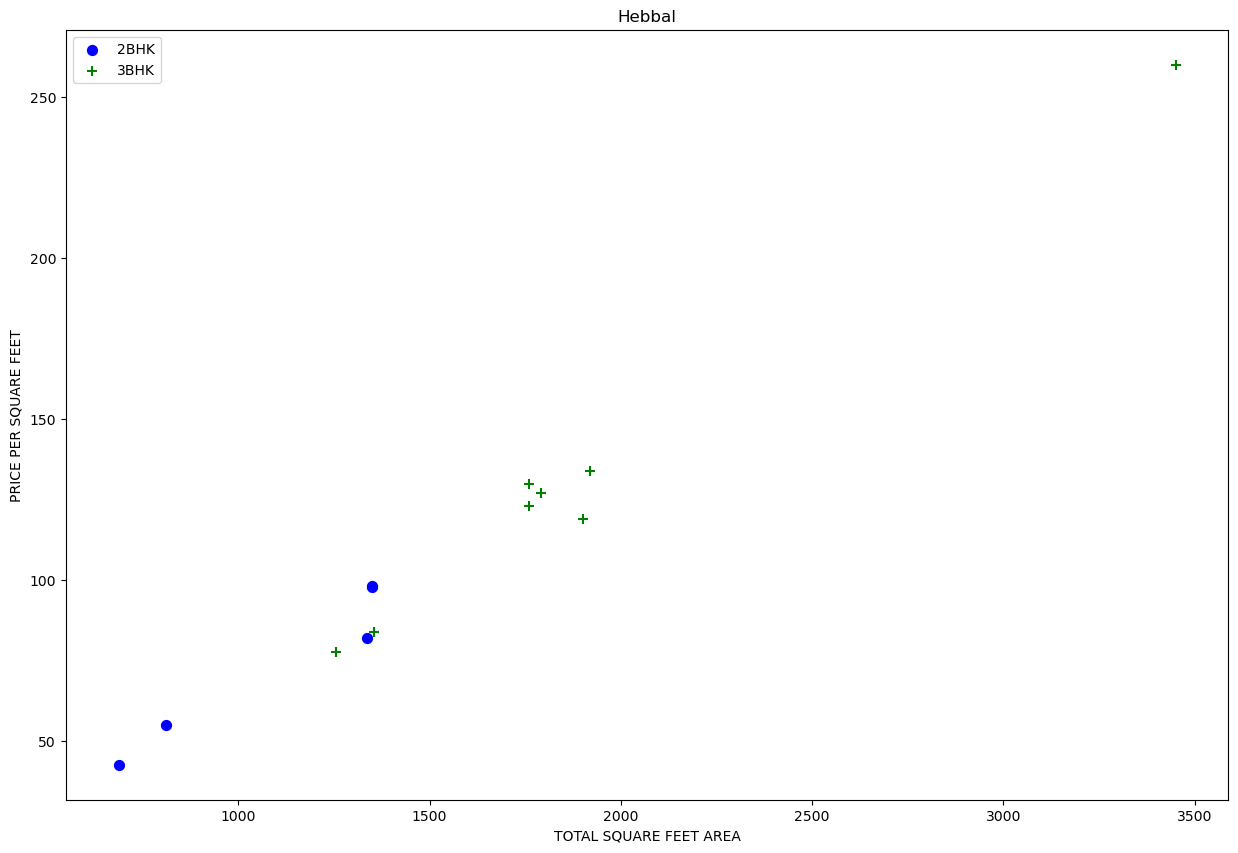

In [39]:
def plot_scatter_chart(df,location):
    bhk2 = df[(df.location==location) & (df.bhk==2)]
    bhk3 = df[(df.location==location) & (df.bhk==3)]
    matplotlib.rcParams['figure.figsize'] = (15,10)
    plt.scatter(bhk2.total_sqft,bhk2.price,color='blue',label='2BHK' ,s=50)
    plt.scatter(bhk3.total_sqft,bhk3.price,marker='+',color='green',label='3BHK',s=50)
    plt.xlabel("TOTAL SQUARE FEET AREA")
    plt.ylabel("PRICE PER SQUARE FEET")
    plt.title(location)
    plt.legend()

plot_scatter_chart(df7,"Hebbal")

In [40]:
def remove_bhk_outliers(df):
      exclude_indices = np.array([])
      for location,location_df in df.groupby('location'):
          bhk_stats = {}
          for bhk,bhk_df in location_df.groupby('bhk'):
              bhk_stats[bhk]={
                  'mean': np.mean(bhk_df.price_per_sqft),
                  'std': np.std(bhk_df.price_per_sqft),
                  'count':bhk_df.shape[0]
              }
          for bhk,bhk_df in location_df.groupby('bhk'):
              stats = bhk_stats.get(bhk-1)
              if stats and stats['count']>5:
                   exclude_indices = np.append(exclude_indices,bhk_df[bhk_df.price_per_sqft<(stats['mean'])].index.values)
      return df.drop(exclude_indices,axis='index')

df8 = remove_bhk_outliers(df7)
df8.shape

(1279, 7)

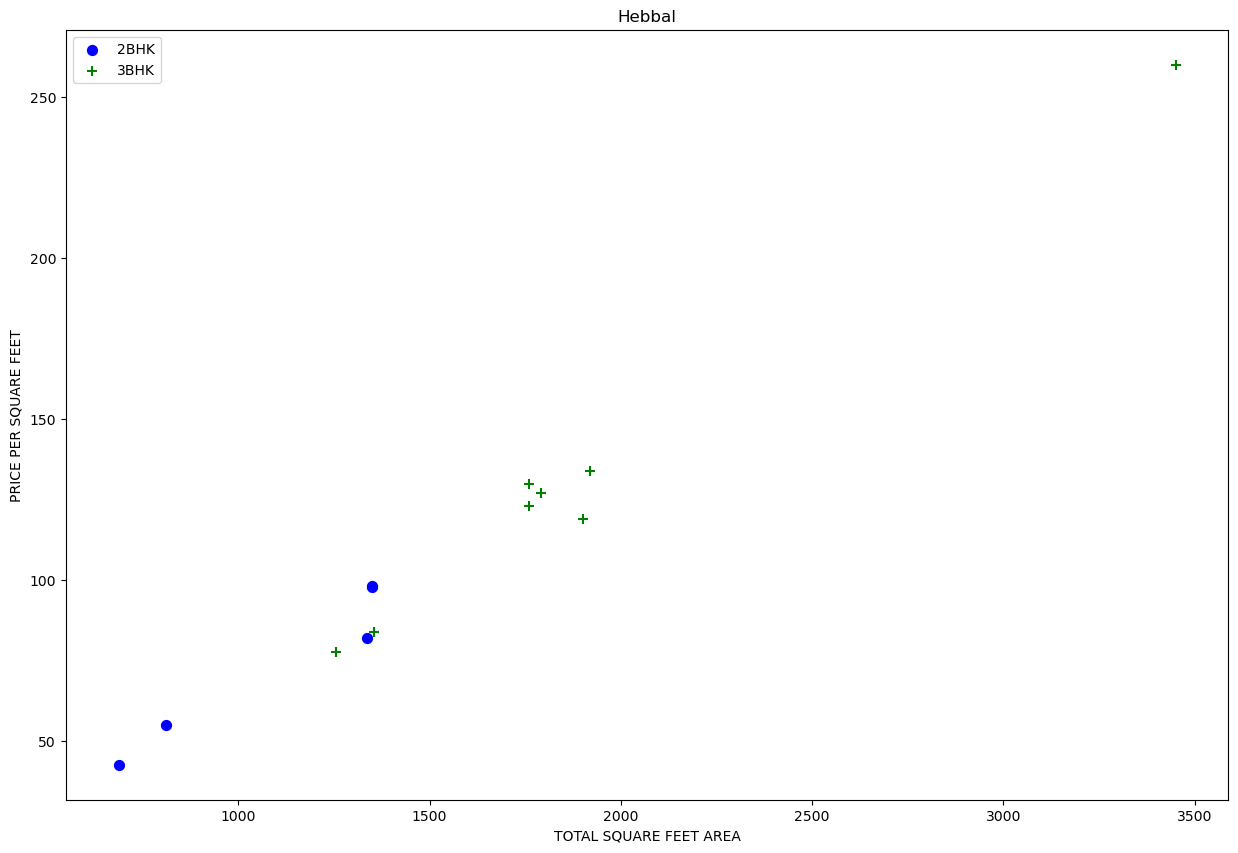

In [41]:
plot_scatter_chart(df8,'Hebbal')

Text(0, 0.5, 'count')

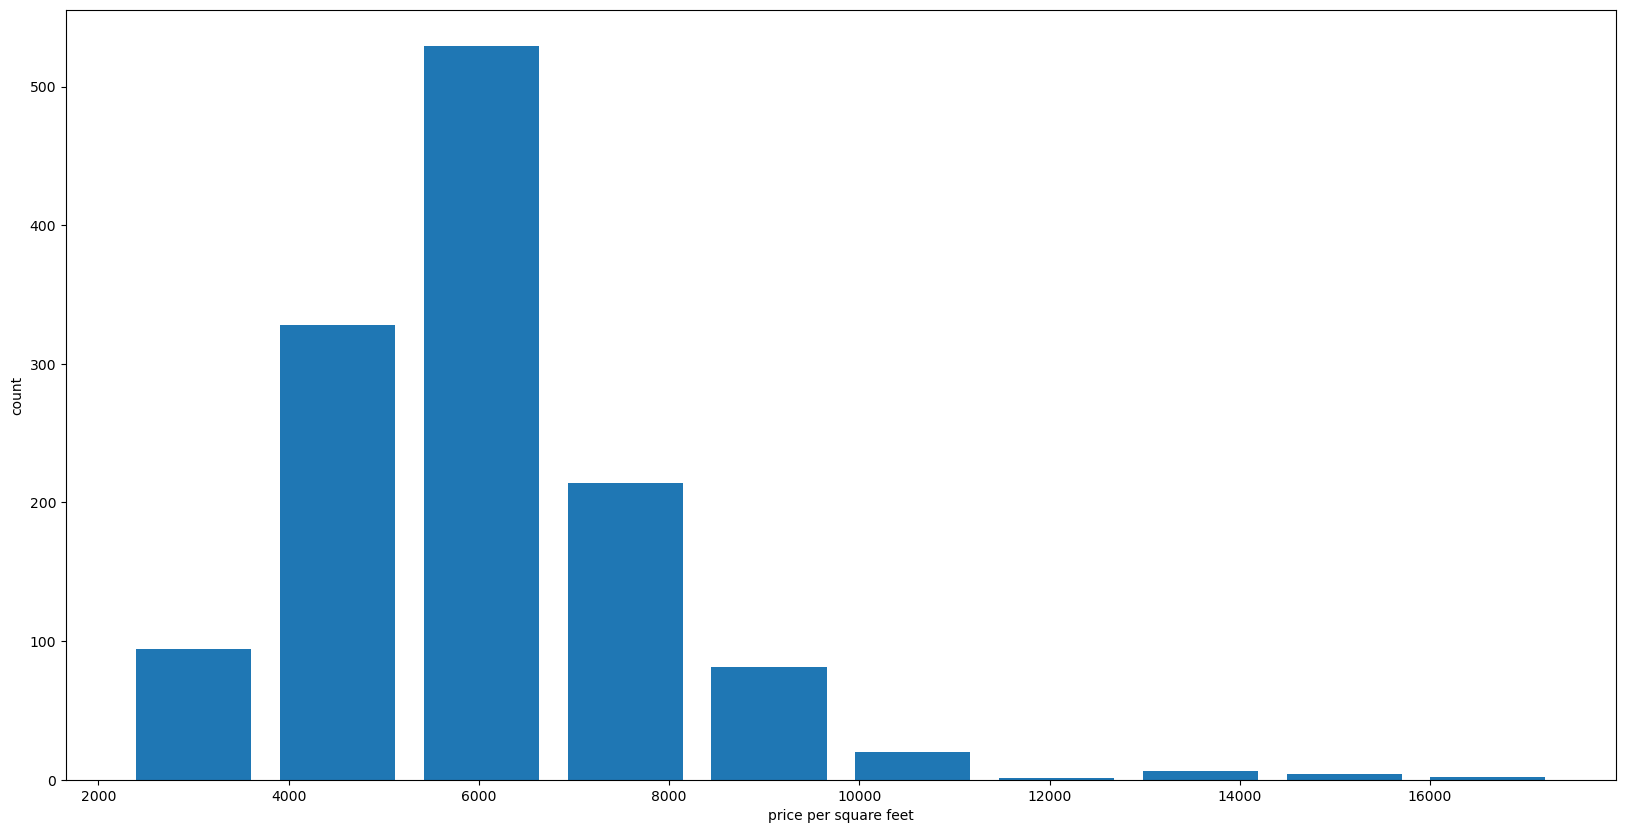

In [42]:
import matplotlib
matplotlib.rcParams['figure.figsize'] = (20,10)
plt.hist(df8.price_per_sqft,rwidth=0.8)
plt.xlabel("price per square feet")
plt.ylabel("count")

In [43]:
df8.bath.unique()

array([2., 3., 1., 5., 4., 8., 6., 7., 9.])

In [44]:
df8[df8.bath>10]

,location,size,total_sqft,bath,price,bhk,price_per_sqft


Text(0, 0.5, 'count')

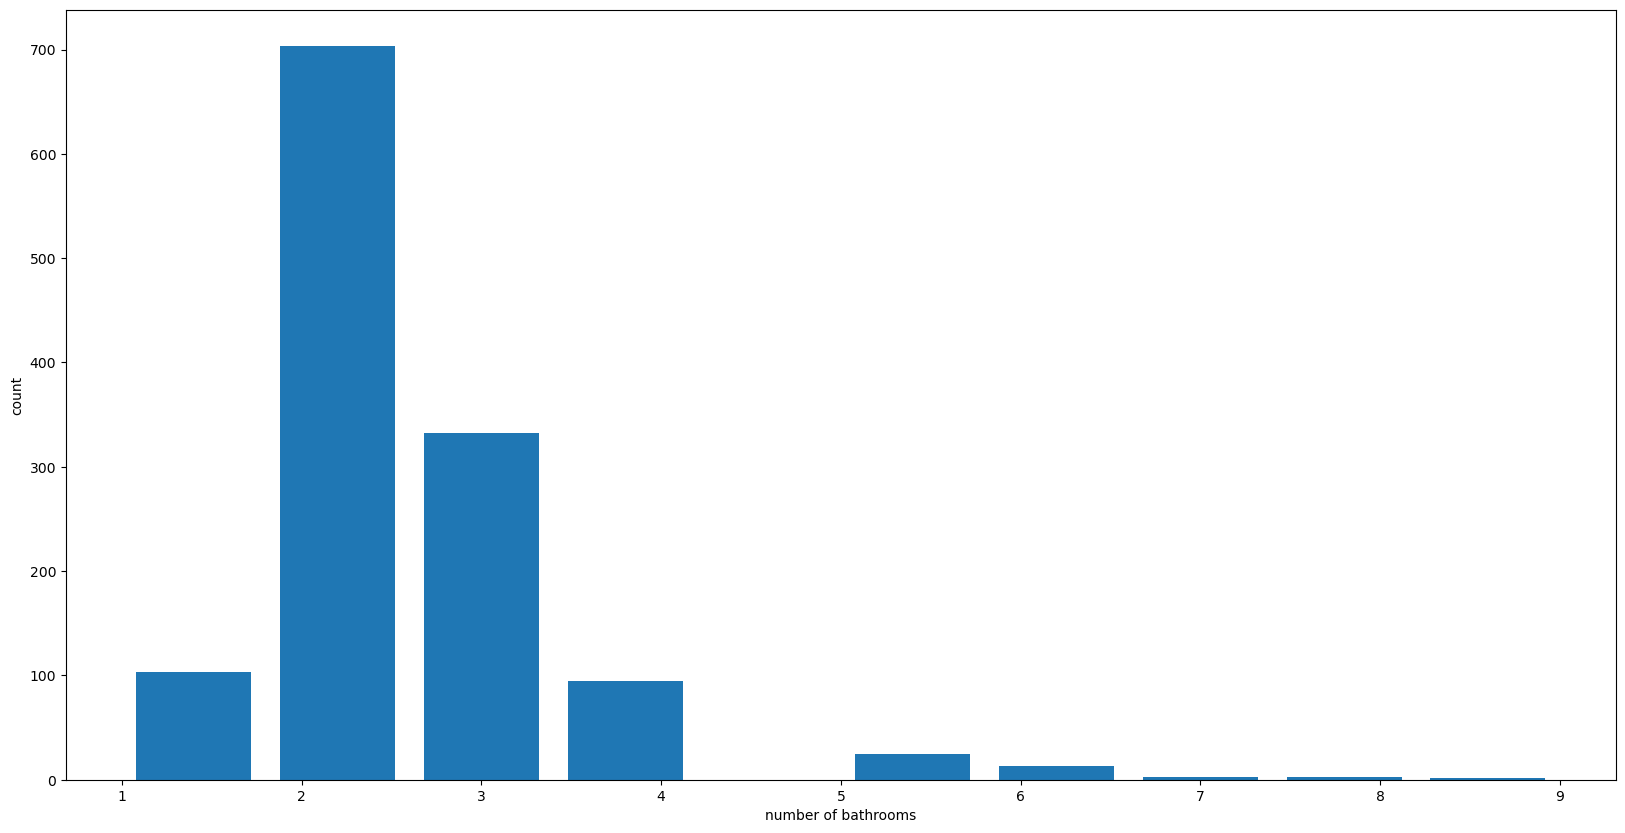

In [45]:
plt.hist(df8.bath,rwidth = 0.8)
plt.xlabel('number of bathrooms')
plt.ylabel('count')


In [46]:
df8[df8.bath>df8.bhk+2]


,location,size,total_sqft,bath,price,bhk,price_per_sqft


In [47]:
df9 = df8[df8.bath<df8.bhk+2]
df9.shape

(1264, 7)

In [48]:
df10=df9.drop(['size','price_per_sqft'],axis='columns')
df10.head()

,location,total_sqft,bath,price,bhk
0,7th Phase JP Nagar,1080.0,2.0,72.0,2
1,7th Phase JP Nagar,1270.0,2.0,93.0,2
2,7th Phase JP Nagar,1420.0,2.0,100.0,3
3,7th Phase JP Nagar,1245.0,2.0,94.0,2
4,7th Phase JP Nagar,1175.0,2.0,82.0,2


In [49]:
# MODEL BUILDING
pd.get_dummies(df10.location)

,7th Phase JP Nagar,Akshaya Nagar,Bannerghatta Road,Begur Road,Bellandur,Bisuvanahalli,Chandapura,Electronic City,Electronic City Phase II,Electronics City Phase 1,...,TC Palaya,Thanisandra,Uttarahalli,Varthur,Vijayanagar,Vittasandra,Whitefield,Yelahanka,Yeshwanthpur,other
0,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1893,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
1896,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
1898,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
1899,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True


In [50]:
dummies = pd.get_dummies(df10.location)
dummies.head(3)

,7th Phase JP Nagar,Akshaya Nagar,Bannerghatta Road,Begur Road,Bellandur,Bisuvanahalli,Chandapura,Electronic City,Electronic City Phase II,Electronics City Phase 1,...,TC Palaya,Thanisandra,Uttarahalli,Varthur,Vijayanagar,Vittasandra,Whitefield,Yelahanka,Yeshwanthpur,other
0,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [56]:
df11 = pd.concat([df10,dummies.drop('other',axis='columns')],axis='columns')
df11.head(20)

,location,total_sqft,bath,price,bhk,7th Phase JP Nagar,Akshaya Nagar,Bannerghatta Road,Begur Road,Bellandur,...,Sarjapur Road,TC Palaya,Thanisandra,Uttarahalli,Varthur,Vijayanagar,Vittasandra,Whitefield,Yelahanka,Yeshwanthpur
0,7th Phase JP Nagar,1080.0,2.0,72.00,2,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,7th Phase JP Nagar,1270.0,2.0,93.00,2,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,7th Phase JP Nagar,1420.0,2.0,100.00,3,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,7th Phase JP Nagar,1245.0,2.0,94.00,2,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,7th Phase JP Nagar,1175.0,2.0,82.00,2,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5,7th Phase JP Nagar,1400.0,2.0,95.00,3,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
6,7th Phase JP Nagar,2225.0,3.0,160.00,3,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7,7th Phase JP Nagar,1050.0,2.0,71.00,2,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
8,7th Phase JP Nagar,1100.0,2.0,46.00,2,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9,7th Phase JP Nagar,918.0,2.0,50.49,2,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [52]:
df12 = df11.drop('location',axis = 'columns')
df12.head(7)

,total_sqft,bath,price,bhk,7th Phase JP Nagar,Akshaya Nagar,Bannerghatta Road,Begur Road,Bellandur,Bisuvanahalli,...,Sarjapur Road,TC Palaya,Thanisandra,Uttarahalli,Varthur,Vijayanagar,Vittasandra,Whitefield,Yelahanka,Yeshwanthpur
0,1080.0,2.0,72.0,2,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,1270.0,2.0,93.0,2,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,1420.0,2.0,100.0,3,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,1245.0,2.0,94.0,2,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,1175.0,2.0,82.0,2,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5,1400.0,2.0,95.0,3,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
6,2225.0,3.0,160.0,3,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [53]:
df12.shape

(1264, 49)

In [54]:
X = df12.drop('price',axis = 'columns')
X.head()

,total_sqft,bath,bhk,7th Phase JP Nagar,Akshaya Nagar,Bannerghatta Road,Begur Road,Bellandur,Bisuvanahalli,Chandapura,...,Sarjapur Road,TC Palaya,Thanisandra,Uttarahalli,Varthur,Vijayanagar,Vittasandra,Whitefield,Yelahanka,Yeshwanthpur
0,1080.0,2.0,2,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,1270.0,2.0,2,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,1420.0,2.0,3,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,1245.0,2.0,2,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,1175.0,2.0,2,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [55]:
y=df12.price
y.head()

0     72.0
1     93.0
2    100.0
3     94.0
4     82.0
Name: price, dtype: float64

In [55]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=10)


In [56]:
from sklearn.linear_model import LinearRegression
lr_clf = LinearRegression()
lr_clf.fit(X_train,y_train)
lr_clf.score(X_test,y_test)

0.8778735282377316

In [57]:
from sklearn.model_selection import ShuffleSplit,cross_val_score

cv = ShuffleSplit(n_splits=5, test_size = 0.2 ,random_state = 0)
cross_val_score(LinearRegression(), X ,y ,cv=cv)


array([0.89109902, 0.88267066, 0.88142827, 0.8731758 , 0.8855486 ])

In [58]:
X.columns

Index(['total_sqft', 'bath', 'bhk', '7th Phase JP Nagar', 'Akshaya Nagar',
       'Bannerghatta Road', 'Begur Road', 'Bellandur', 'Bisuvanahalli',
       'Chandapura', 'Electronic City', 'Electronic City Phase II',
       'Electronics City Phase 1', 'HSR Layout', 'Haralur Road', 'Harlur',
       'Hebbal', 'Hennur Road', 'Hoodi', 'Hosa Road', 'Hulimavu', 'JP Nagar',
       'Jigani', 'KR Puram', 'Kaggadasapura', 'Kanakpura Road', 'Kasavanhalli',
       'Kengeri', 'Koramangala', 'Kothanur', 'Malleshwaram', 'Marathahalli',
       'Old Madras Road', 'Panathur', 'Raja Rajeshwari Nagar', 'Rajaji Nagar',
       'Ramamurthy Nagar', 'Sarjapur', 'Sarjapur  Road', 'TC Palaya',
       'Thanisandra', 'Uttarahalli', 'Varthur', 'Vijayanagar', 'Vittasandra',
       'Whitefield', 'Yelahanka', 'Yeshwanthpur'],
      dtype='object')

In [73]:
def predict_price(location,sqft,bath,bhk):
    loc_index = np.where(X.columns ==location)[0][0]
    
    x=np.zeros(len(X.columns))
    x[0] = sqft
    x[1] = bath
    x[2] = bhk
    if loc_index >=0:
        x[loc_index] = 1
    return lr_clf.predict([x])[0]
    

In [80]:
predict_price('Electronic City Phase II' ,1000,3,3)

C:\Users\chaitanya\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


37.535147932350014

In [81]:
import pickle
with open('banglore_home_prices_prediction_model.pickle','wb')as f:
    pickle.dump(lr_clf,f)

In [83]:
import json
columns = {
    'data_columns' : [col.lower() for col in X.columns]
}
with open("columns.json","w") as f :
      f.write(json.dumps(columns))